In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint


In [23]:
demo_path = "Resources/state_demographics.csv"
demo_df = pd.read_csv(demo_path)
demo_df.head()

,State,Population.Population Percent Change,Population.2014 Population,Population.2010 Population,Age.Percent Under 5 Years,Age.Percent Under 18 Years,Age.Percent 65 and Older,Miscellaneous.Percent Female,Ethnicities.White Alone,Ethnicities.Black Alone,...,Employment.Nonemployer Establishments,Employment.Firms.Total,Employment.Firms.Men-Owned,Employment.Firms.Women-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned,Population.Population per Square Mile,Miscellaneous.Land Area
0,Connecticut,-10.2,3605944,3574097,5.1,20.4,17.7,51.2,79.7,12.2,...,286874,326693,187845,106678,56113,259614,31056,281182,738.1,4842.36
1,Delaware,8.4,989948,897934,5.6,20.9,19.4,51.7,69.2,23.2,...,68623,73418,38328,23964,14440,54782,7206,60318,460.8,1948.54
2,District of Columbia,17.3,689545,601723,6.4,18.2,12.4,52.6,46.0,46.0,...,62583,63408,30237,27064,29983,29521,5070,54217,9856.5,61.05
3,Florida,14.2,21538187,18801310,5.3,19.7,20.9,51.1,77.3,16.9,...,2388050,2100187,1084885,807817,926112,1121749,185756,1846686,350.6,53624.76
4,Georgia,9.6,10711908,9687653,6.2,23.6,14.3,51.4,60.2,32.6,...,955621,929864,480578,376506,371588,538893,96787,800585,168.4,57513.49


In [24]:
list(demo_df.columns)

['State',
 'Population.Population Percent Change',
 'Population.2014 Population',
 'Population.2010 Population',
 'Age.Percent Under 5 Years',
 'Age.Percent Under 18 Years',
 'Age.Percent 65 and Older',
 'Miscellaneous.Percent Female',
 'Ethnicities.White Alone',
 'Ethnicities.Black Alone',
 'Ethnicities.American Indian and Alaska Native Alone',
 'Ethnicities.Asian Alone',
 'Ethnicities.Native Hawaiian and Other Pacific Islander Alone',
 'Ethnicities.Two or More Races',
 'Ethnicities.Hispanic or Latino',
 'Ethnicities.White Alone, not Hispanic or Latino',
 'Miscellaneous.Veterans',
 'Miscellaneous.Foreign Born',
 'Housing.Housing Units',
 'Housing.Homeownership Rate',
 'Housing.Median Value of Owner-Occupied Units',
 'Housing.Households',
 'Housing.Persons per Household',
 'Miscellaneous.Living in Same House +1 Years',
 'Miscellaneous.Language Other than English at Home',
 'Housing.Households with a computer',
 'Housing.Households with a Internet',
 'Education.High School or Higher',
 

In [25]:
demo_df = demo_df.drop(columns=['Population.Population Percent Change','Population.2010 Population','Miscellaneous.Percent Female',
                               'Ethnicities.White Alone', 'Ethnicities.Black Alone', 'Ethnicities.American Indian and Alaska Native Alone',
 'Ethnicities.Asian Alone',
 'Ethnicities.Native Hawaiian and Other Pacific Islander Alone',
 'Ethnicities.Two or More Races',
 'Ethnicities.Hispanic or Latino',
 'Ethnicities.White Alone, not Hispanic or Latino',
 'Miscellaneous.Veterans',
 'Miscellaneous.Foreign Born',
 'Housing.Housing Units',
 'Housing.Homeownership Rate',
 'Housing.Median Value of Owner-Occupied Units',
 'Housing.Households',
 'Housing.Persons per Household',
 'Miscellaneous.Living in Same House +1 Years',
 'Miscellaneous.Language Other than English at Home',
 'Housing.Households with a computer',
 'Housing.Households with a Internet',
 'Education.High School or Higher',
 "Education.Bachelor's Degree or Higher",
 'Miscellaneous.Percent Under 66 Years With a Disability',
 'Miscellaneous.Percent Under 65 Years Witout Health insurance',
 'Sales.Accommodation and Food Services Sales',
 'Miscellaneous.Manufacturers Shipments',
 'Sales.Retail Sales',
 'Miscellaneous.Mean Travel Time to Work','Income.Persons Below Poverty Level',
 'Employment.Nonemployer Establishments',
 'Employment.Firms.Total',
 'Employment.Firms.Men-Owned',
 'Employment.Firms.Women-Owned',
 'Employment.Firms.Minority-Owned',
 'Employment.Firms.Nonminority-Owned',
 'Employment.Firms.Veteran-Owned',
 'Employment.Firms.Nonveteran-Owned','Miscellaneous.Land Area'])
demo_df.head()

,State,Population.2014 Population,Age.Percent Under 5 Years,Age.Percent Under 18 Years,Age.Percent 65 and Older,Income.Median Houseold Income,Income.Per Capita Income,Population.Population per Square Mile
0,Connecticut,3605944,5.1,20.4,17.7,78444,44496,738.1
1,Delaware,989948,5.6,20.9,19.4,68287,35450,460.8
2,District of Columbia,689545,6.4,18.2,12.4,86420,56147,9856.5
3,Florida,21538187,5.3,19.7,20.9,55660,31619,350.6
4,Georgia,10711908,6.2,23.6,14.3,58700,31067,168.4


In [26]:
demo_df = demo_df.rename(columns={'Population.2014 Population':'population', 
                         'Age.Percent Under 5 Years':'% age under 5', 
                         'Age.Percent Under 18 Years':'% age under 18',
                        'Age.Percent 65 and Older': '% age 65 and older',
                       'Income.Median Houseold Income': "median household income",
                        'Income.Per Capita Income': 'per capita income',
                        'Population.Population per Square Mile': 'population per square mile'})
demo_df

,State,population,% age under 5,% age under 18,% age 65 and older,median household income,per capita income,population per square mile
0,Connecticut,3605944,5.1,20.4,17.7,78444,44496,738.1
1,Delaware,989948,5.6,20.9,19.4,68287,35450,460.8
2,District of Columbia,689545,6.4,18.2,12.4,86420,56147,9856.5
3,Florida,21538187,5.3,19.7,20.9,55660,31619,350.6
4,Georgia,10711908,6.2,23.6,14.3,58700,31067,168.4
5,Hawaii,1455271,6.0,21.2,19.0,81275,35567,211.8
6,Alabama,5024279,6.0,22.2,17.3,50536,27928,94.4
7,Alaska,733391,7.0,24.6,12.5,77640,36787,1.2
8,Arizona,7151502,5.9,22.5,18.0,58945,30694,56.3
9,Arkansas,3011524,6.2,23.2,17.4,47597,26577,56.0


In [27]:
demo_df = demo_df.replace({'Alabama': 'AL',
    'Montana': 'MT',
    'Alaska': 'AK',
    'Nebraska': 'NE',
    'Arizona': 'AZ',
    'Nevada': 'NV',
    'Arkansas': 'AR',
    'New Hampshire': 'NH',
    'California': 'CA',
    'New Jersey': 'NJ',
    'Colorado': 'CO',
    'New Mexico': 'NM',
    'Connecticut': 'CT',
    'New York': 'NY',
    'Delaware': 'DE',
    'North Carolina': 'NC',
    'Florida': 'FL',
    'North Dakota': 'ND',
    'Georgia': 'GA',
    'Ohio': 'OH',
    'Hawaii': 'HI',
    'Oklahoma': 'OK',
    'Idaho': 'ID',
    'Oregon': 'OR',
    'Illinois': 'IL',
    'Pennsylvania': 'PA',
    'Indiana': 'IN',
    'Rhode Island': 'RI',
    'Iowa': 'IA',
    'South Carolina': 'SC',
    'Kansas': 'KS',
    'South Dakota': 'SD',
    'Kentucky': 'KY',
    'Tennessee': 'TN',
    'Louisiana': 'LA',
    'Texas': 'TX',
    'Maine': 'ME',
    'Utah': 'UT',
    'Maryland': 'MD',
    'Vermont': 'VT',
    'Massachusetts': 'MA',
    'Virginia': 'VA',
    'Michigan': 'MI',
    'Washington': 'WA',
    'Minnesota': 'MN',
    'West Virginia': 'WV',
    'Mississippi': 'MS',
    'Wisconsin': 'WI',
    'Missouri': 'MO',
    'Wyoming': 'WY',
    'District of Columbia': 'DC'})
demo_df.head()

,State,population,% age under 5,% age under 18,% age 65 and older,median household income,per capita income,population per square mile
0,CT,3605944,5.1,20.4,17.7,78444,44496,738.1
1,DE,989948,5.6,20.9,19.4,68287,35450,460.8
2,DC,689545,6.4,18.2,12.4,86420,56147,9856.5
3,FL,21538187,5.3,19.7,20.9,55660,31619,350.6
4,GA,10711908,6.2,23.6,14.3,58700,31067,168.4


In [28]:
food_path = 'Resources/FastFoodRestaurants.csv'
food_db = pd.read_csv(food_path)
food_db.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [29]:
count = food_db['name'].nunique()
count

548

In [30]:
food_db = food_db.drop(columns=['websites', 'keys', 'country'])
food_db

,address,city,latitude,longitude,name,postalCode,province
0,324 Main St,Massena,44.921300,-74.890210,McDonald's,13662,NY
1,530 Clinton Ave,Washington Court House,39.532550,-83.445260,Wendy's,43160,OH
2,408 Market Square Dr,Maysville,38.627360,-83.791410,Frisch's Big Boy,41056,KY
3,6098 State Highway 37,Massena,44.950080,-74.845530,McDonald's,13662,NY
4,139 Columbus Rd,Athens,39.351550,-82.097280,OMG! Rotisserie,45701,OH
...,...,...,...,...,...,...,...
9995,3013 Peach Orchard Rd,Augusta,33.415257,-82.024531,Wendy's,30906,GA
9996,678 Northwest Hwy,Cary,42.217300,-88.255800,Lee's Oriental Martial Arts,60013,IL
9997,1708 Main St,Longmont,40.189190,-105.101720,Five Guys,80501,CO
9998,67740 Highway 111,Cathedral City,33.788640,-116.482150,El Pollo Loco,92234,CA


In [31]:
food_db = food_db.rename(columns={'province':'State', 'postalCode':'postal_code', 'name':'restaurant'})
food_db

,address,city,latitude,longitude,restaurant,postal_code,State
0,324 Main St,Massena,44.921300,-74.890210,McDonald's,13662,NY
1,530 Clinton Ave,Washington Court House,39.532550,-83.445260,Wendy's,43160,OH
2,408 Market Square Dr,Maysville,38.627360,-83.791410,Frisch's Big Boy,41056,KY
3,6098 State Highway 37,Massena,44.950080,-74.845530,McDonald's,13662,NY
4,139 Columbus Rd,Athens,39.351550,-82.097280,OMG! Rotisserie,45701,OH
...,...,...,...,...,...,...,...
9995,3013 Peach Orchard Rd,Augusta,33.415257,-82.024531,Wendy's,30906,GA
9996,678 Northwest Hwy,Cary,42.217300,-88.255800,Lee's Oriental Martial Arts,60013,IL
9997,1708 Main St,Longmont,40.189190,-105.101720,Five Guys,80501,CO
9998,67740 Highway 111,Cathedral City,33.788640,-116.482150,El Pollo Loco,92234,CA


In [32]:
food_db = food_db.replace({'Co Spgs':'CO'})
food_db

,address,city,latitude,longitude,restaurant,postal_code,State
0,324 Main St,Massena,44.921300,-74.890210,McDonald's,13662,NY
1,530 Clinton Ave,Washington Court House,39.532550,-83.445260,Wendy's,43160,OH
2,408 Market Square Dr,Maysville,38.627360,-83.791410,Frisch's Big Boy,41056,KY
3,6098 State Highway 37,Massena,44.950080,-74.845530,McDonald's,13662,NY
4,139 Columbus Rd,Athens,39.351550,-82.097280,OMG! Rotisserie,45701,OH
...,...,...,...,...,...,...,...
9995,3013 Peach Orchard Rd,Augusta,33.415257,-82.024531,Wendy's,30906,GA
9996,678 Northwest Hwy,Cary,42.217300,-88.255800,Lee's Oriental Martial Arts,60013,IL
9997,1708 Main St,Longmont,40.189190,-105.101720,Five Guys,80501,CO
9998,67740 Highway 111,Cathedral City,33.788640,-116.482150,El Pollo Loco,92234,CA


In [33]:
food_db = food_db.replace(to_replace={'A & W Family Restaurant',
                                          'A&W All American Food',
                                          'A&W All-American Food',
                                          'A&W All-American Foods',
                                          'A&W Restaurant',
                                          'A&W/Long John Silvers',
                                          'A&w', 'A&w Restaurant','A&Ws'}, value='A&W', regex=True)
# sort = food_db.sort_values('restaurant')
# sort['restaurant'].unique()

In [34]:
food_db = food_db.replace(to_replace={"Mc Donald's","Mc Donalds","McDonald's","McDonald's of Mililani Mauka","Mcdonald's",
                           "McDonalds","McDonald's #25557","McDonald's - Walmart","McDonald's @ Old Atlanta","McDonald’s",
                            'McDonalds @ Old Atlanta'}, value="McDonald's", regex=True)
sort = food_db.sort_values('restaurant')
sort['restaurant'].unique()

array(['11-Jul', '31st Avenue Gyro', '7-Eleven', 'A&W',
       "AJ's Hotdogs & Gyros", "Alice's", 'Ama Ristorante',
       'Amigos/Kings Classic', 'Aprisa Mexican Cuisine', "Arby's",
       "Arby's Antigo", 'Arbys', 'Arctic Circle', 'Au Bon Pain',
       "Auntie Anne's", 'Aw Restaurant', 'B K',
       'B Z Breakfast Burgers Beyond', 'B. Good',
       'BGR - The Burger Joint', "BIG & little's Restaurant", 'BLIMPIE',
       'Back Yard Burgers', 'Backyard Burgers', 'Bad Daddys Burger Bar',
       'Baja Fresh', 'Baja Fresh Mexican Grill', "Baker's Drive Thru",
       'Ball State Lafollette Dining', 'Bamboo Bistro', 'Baskin-Robbins',
       'Bb&t', "Ben & Jerry's", 'Bills Place', "Blake's LotaBurger",
       "Blake's Lotaburger", 'Blakes Lotaburger', 'Blimpie',
       'Blimpie Subs & Sandwiches', 'Blondies', 'Bob Evans',
       'Bob Evans Restaurant', "Bobby's Burger Palace",
       "Bojangles' Famous Chicken 'n Biscuits", 'Boston Chowda Company',
       'Boston Market', 'Boston Market 381'

In [35]:
food_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   address      10000 non-null  object 
 1   city         10000 non-null  object 
 2   latitude     10000 non-null  float64
 3   longitude    10000 non-null  float64
 4   restaurant   10000 non-null  object 
 5   postal_code  10000 non-null  object 
 6   State        10000 non-null  object 
dtypes: float64(2), object(5)
memory usage: 547.0+ KB


In [36]:
df_merge = pd.merge(food_db, demo_df, how='left', on='State')
df_merge

,address,city,latitude,longitude,restaurant,postal_code,State,population,% age under 5,% age under 18,% age 65 and older,median household income,per capita income,population per square mile
0,324 Main St,Massena,44.921300,-74.890210,McDonald's,13662,NY,20201249,5.8,20.7,16.9,68486,39326,411.2
1,530 Clinton Ave,Washington Court House,39.532550,-83.445260,Wendy's,43160,OH,11799448,5.9,22.1,17.5,56602,31552,282.3
2,408 Market Square Dr,Maysville,38.627360,-83.791410,Frisch's Big Boy,41056,KY,4505836,6.1,22.4,16.8,50589,28178,109.9
3,6098 State Highway 37,Massena,44.950080,-74.845530,McDonald's,13662,NY,20201249,5.8,20.7,16.9,68486,39326,411.2
4,139 Columbus Rd,Athens,39.351550,-82.097280,OMG! Rotisserie,45701,OH,11799448,5.9,22.1,17.5,56602,31552,282.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3013 Peach Orchard Rd,Augusta,33.415257,-82.024531,Wendy's,30906,GA,10711908,6.2,23.6,14.3,58700,31067,168.4
9996,678 Northwest Hwy,Cary,42.217300,-88.255800,Lee's Oriental Martial Arts,60013,IL,12812508,5.9,22.2,16.1,65886,36038,231.1
9997,1708 Main St,Longmont,40.189190,-105.101720,Five Guys,80501,CO,5773714,5.8,21.9,14.6,72331,38226,48.5
9998,67740 Highway 111,Cathedral City,33.788640,-116.482150,El Pollo Loco,92234,CA,39538223,6.0,22.5,14.8,75235,36955,239.1


In [16]:
count = food_db.groupby(['State', 'restaurant'])['restaurant'].apply(len)
count = pd.DataFrame(count)
count

restaurant
State restaurant                
AK    Arby's                   3
      Carl's Jr                1
      Domino's Pizza           2
      McDonald's               3
      Pizza Hut                2
...                          ...
WY    Sonic Drive-In           1
      Subway                   7
      Taco Bell                4
      Taco John's              2
      Wendy's                  3

[1826 rows x 1 columns]

In [17]:
new_count = count.rename(columns = {'restaurant':'total'})
new_count = new_count.reset_index(level=['restaurant','State'])
new_count
# output = new_count.to_csv('Output/count.csv', index=False)
# output

,State,restaurant,total
0,AK,Arby's,3
1,AK,Carl's Jr,1
2,AK,Domino's Pizza,2
3,AK,McDonald's,3
4,AK,Pizza Hut,2
...,...,...,...
1821,WY,Sonic Drive-In,1
1822,WY,Subway,7
1823,WY,Taco Bell,4
1824,WY,Taco John's,2


In [18]:
total_by_state = new_count.groupby('State')['total'].sum()
total_by_state = total_by_state.reset_index(level=['State'])
total_by_state.head()

,State,total
0,AK,14
1,AL,236
2,AR,151
3,AZ,208
4,CA,676


In [20]:
total_max = total_by_state.max()
print(total_max)
total_min = total_by_state.min()
print(total_min)
mean = round(total_by_state.mean(numeric_only=True), 0)
print(mean)

State     WY
total    676
dtype: object
State    AK
total    14
dtype: object
total    196.0
dtype: float64


In [39]:
df_merge2 = pd.merge(total_by_state, demo_df, how='left', on='State')
df_merge2.head()

,State,total,population,% age under 5,% age under 18,% age 65 and older,median household income,per capita income,population per square mile
0,AK,14,733391,7.0,24.6,12.5,77640,36787,1.2
1,AL,236,5024279,6.0,22.2,17.3,50536,27928,94.4
2,AR,151,3011524,6.2,23.2,17.4,47597,26577,56.0
3,AZ,208,7151502,5.9,22.5,18.0,58945,30694,56.3
4,CA,676,39538223,6.0,22.5,14.8,75235,36955,239.1


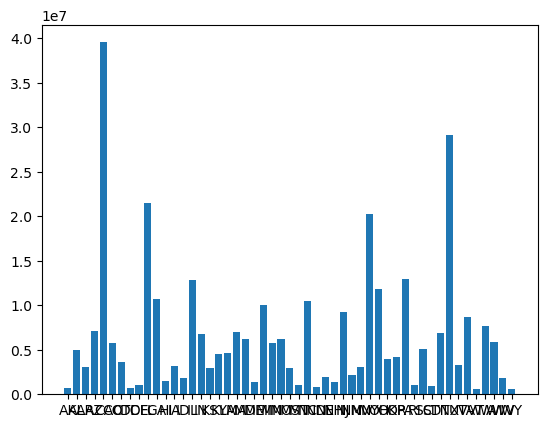

In [46]:
x = df_merge2['State']
y = y = df_merge2['population']
plt.bar(x, y)
plt.show()

The r-value is: 0.86


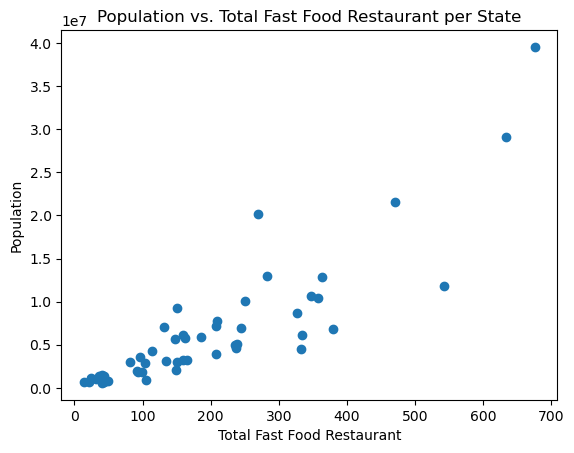

In [45]:
x = df_merge2['total']
y = df_merge2['population']
correlation = st.pearsonr(x, y)
print(f"The r-value is: {round(correlation[0],2)}")
plt.title('Population vs. Total Fast Food Restaurant per State')
plt.xlabel('Total Fast Food Restaurant')
plt.ylabel('Population')
plt.scatter(x, y)
plt.xticks()
plt.show()